# Maternal Health Risk

Data Source: https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import set_config
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12.0, 9.0]
plt.rcParams['font.size'] = 12
set_config(display='diagram')                       # HTML representation of Pipeline (display diagram)
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
file = os.path.join('datasets', 'Maternal Health Risk Data Set.csv')
df = pd.read_csv(file)

# Head and Tail

In [4]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [5]:
df.shape                                        

(1014, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


# Exploratory Data Analysis

Barplot and Pie Chart Helper Functions

In [7]:
def plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None):

    # create figure and axis
    fig, ax = plt.subplots()
    
    # plot bar charts
    sns.barplot(x=x, y=y, hue=hue, data=data, ci=ci, ax=ax)

    # label plot
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    return plot_bar


def plot_pie(df, x, height, shadow=None, startangle=None, title=None):

    # initiate matplot figure
    fig, ax = plt.subplots()

    # plot pie
    ax.pie(x=height, labels=x, autopct='%1.1f%%', shadow=shadow, startangle=startangle, data=df)

    # label plot
    ax.set(title=title) 

    return plot_pie

Age Categories ==> 
Children:  less than 15 years
Youth:     15-24 years,
Adults:    25-65 years,
Seniors:   > 65 years

In [8]:
df['AgeCat'] = pd.cut(df['Age'], [0, 15, 25, 65, np.inf], labels=['Children', 'Youth', 'Adults', 'Seniors'])
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat
0,25,130,80,15.0,98.0,86,high risk,Youth
1,35,140,90,13.0,98.0,70,high risk,Adults
2,29,90,70,8.0,100.0,80,high risk,Adults
3,30,140,85,7.0,98.0,70,high risk,Adults
4,35,120,60,6.1,98.0,76,low risk,Adults


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

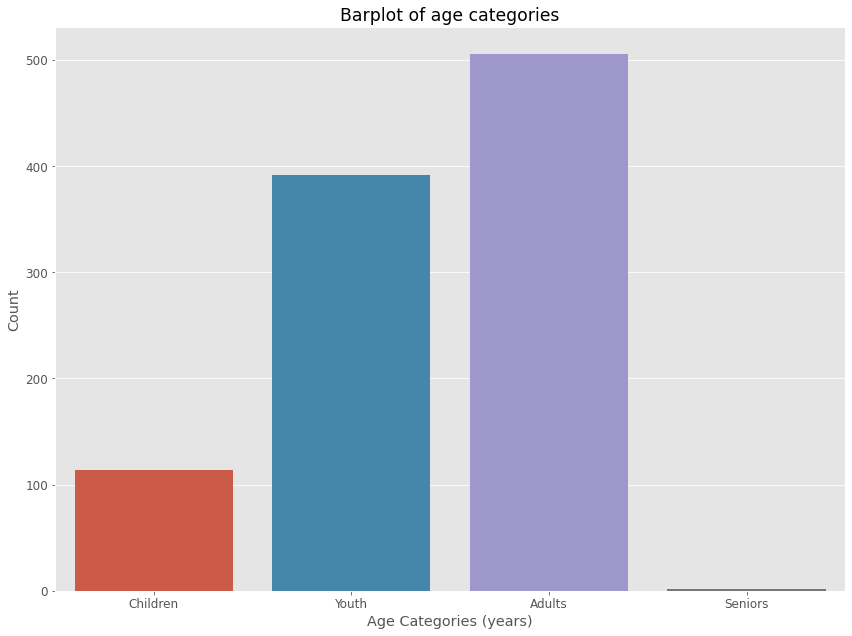

In [9]:
plot_bar(
    x=df['AgeCat'].value_counts().keys(), y=df['AgeCat'].value_counts().values, data=df,
    xlabel='Age Categories (years)', ylabel='Count', title='Barplot of age categories',
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

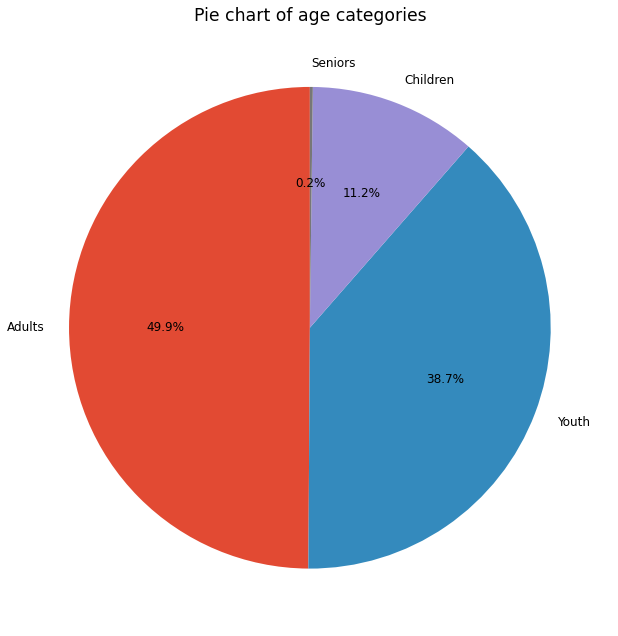

In [10]:
plot_pie(
    df=df, 
    x=df['AgeCat'].value_counts().keys(), height=df['AgeCat'].value_counts(normalize=True).values, startangle=90,
    title='Pie chart of age categories'
)

SystolicBP Categories ==> 
systolic: less than 120 mm Hg,
systolic: 120–129 mm Hg,
systolic: 130 mm Hg or higher

In [11]:
syst_cond = [
    (df['SystolicBP'] < 120),
    (df['SystolicBP'] >= 120) & (df['SystolicBP'] < 130),
    (df['SystolicBP'] >= 130)
]

syst_values = ['less than 120 mm Hg', '120–129 mm Hg', '130 mm Hg or higher'] 


df['SystolicBPCat'] = np.select(condlist=syst_cond, choicelist=syst_values)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat,SystolicBPCat
0,25,130,80,15.0,98.0,86,high risk,Youth,130 mm Hg or higher
1,35,140,90,13.0,98.0,70,high risk,Adults,130 mm Hg or higher
2,29,90,70,8.0,100.0,80,high risk,Adults,less than 120 mm Hg
3,30,140,85,7.0,98.0,70,high risk,Adults,130 mm Hg or higher
4,35,120,60,6.1,98.0,76,low risk,Adults,120–129 mm Hg


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

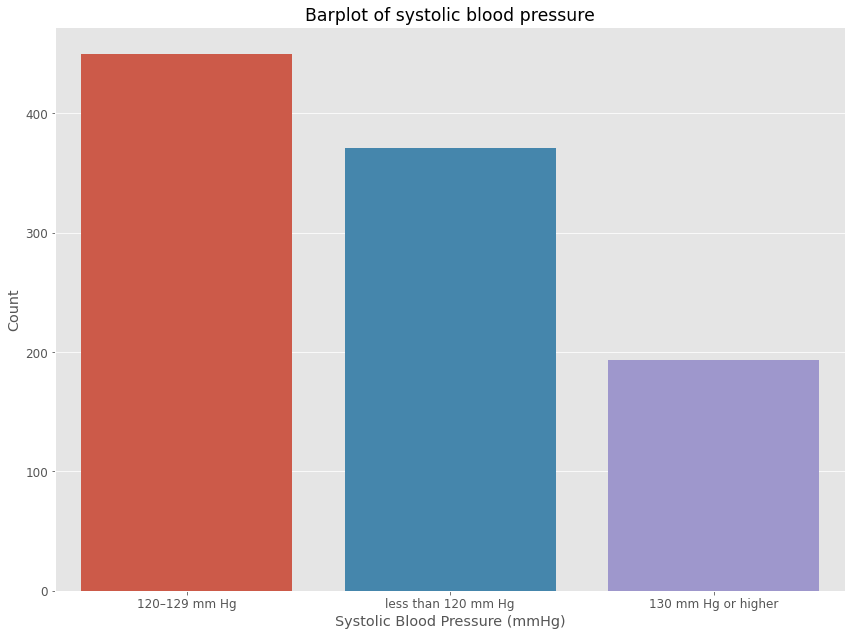

In [12]:
plot_bar(
    x=df['SystolicBPCat'].value_counts().keys(), y=df['SystolicBPCat'].value_counts().values, data=df,
    xlabel='Systolic Blood Pressure (mmHg)', ylabel='Count', title='Barplot of systolic blood pressure',
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

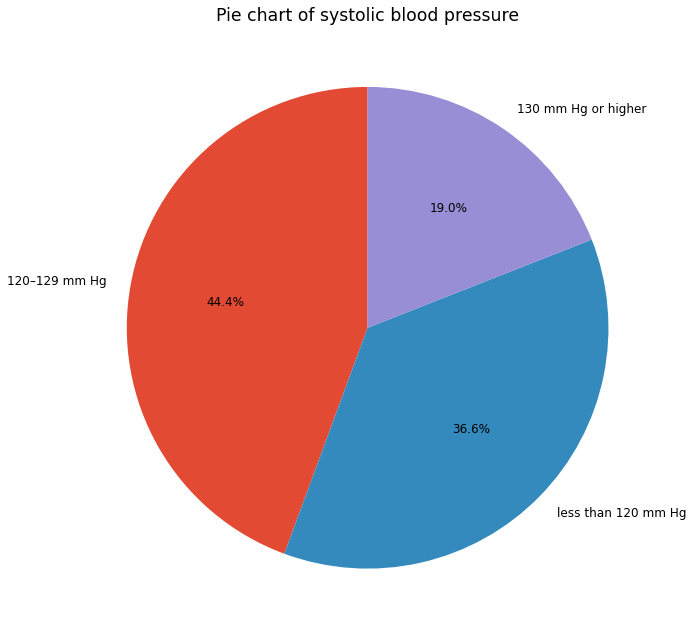

In [13]:
plot_pie(
    df=df, 
    x=df['SystolicBPCat'].value_counts().keys(), height=df['SystolicBPCat'].value_counts(normalize=True).values, startangle=90,
    title='Pie chart of systolic blood pressure'
)

DiastolicBP Categories ==> 
diastolic: less than 80 mm Hg,
diastolic: 80 mm Hg or higher

In [14]:
diast_cond = [
    (df['DiastolicBP'] < 80),
    (df['DiastolicBP'] >= 80)
]

diast_values = ['less than 80 mm Hg', '80 mm Hg or higher'] 


df['DiastolicBPCat'] = np.select(condlist=diast_cond, choicelist=diast_values)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat,SystolicBPCat,DiastolicBPCat
0,25,130,80,15.0,98.0,86,high risk,Youth,130 mm Hg or higher,80 mm Hg or higher
1,35,140,90,13.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher
2,29,90,70,8.0,100.0,80,high risk,Adults,less than 120 mm Hg,less than 80 mm Hg
3,30,140,85,7.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher
4,35,120,60,6.1,98.0,76,low risk,Adults,120–129 mm Hg,less than 80 mm Hg


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

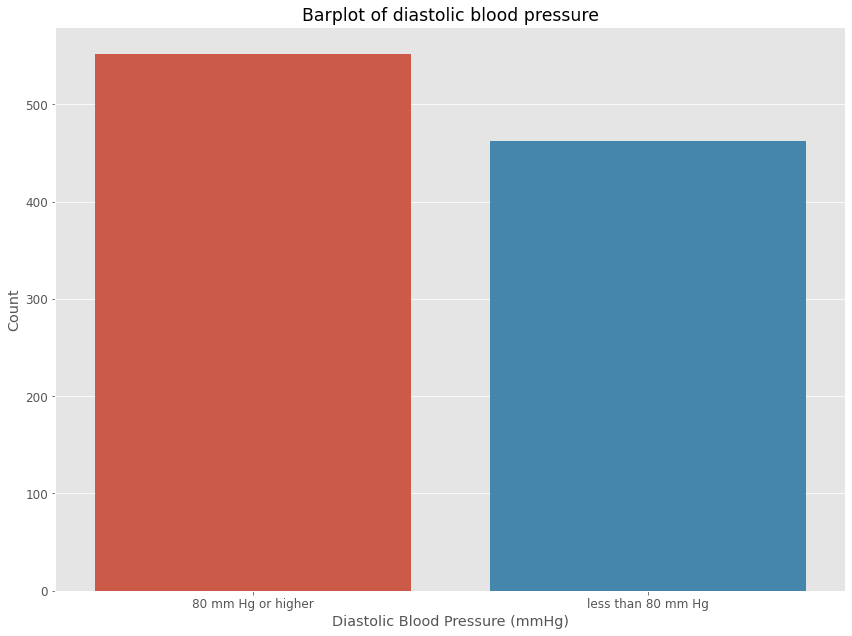

In [15]:
plot_bar(
    x=df['DiastolicBPCat'].value_counts().keys(), y=df['DiastolicBPCat'].value_counts().values, data=df,
    xlabel='Diastolic Blood Pressure (mmHg)', ylabel='Count', title='Barplot of diastolic blood pressure',
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

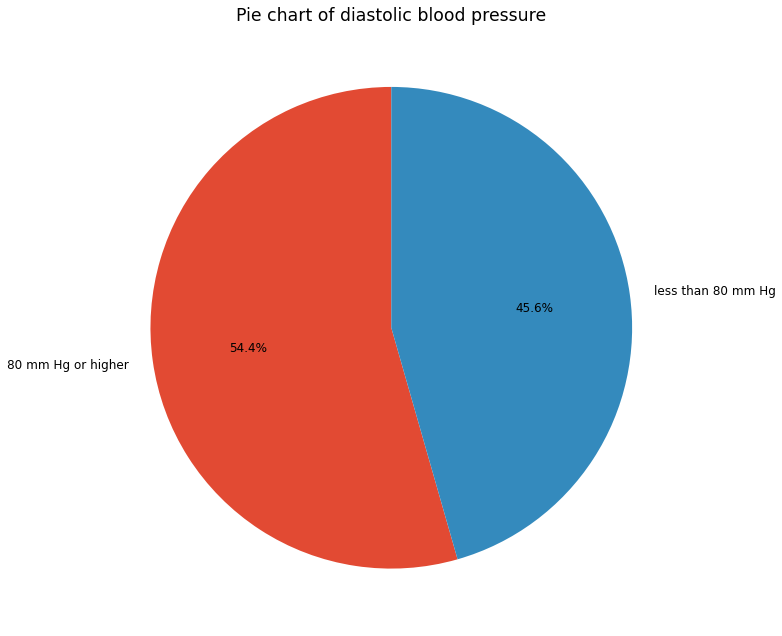

In [16]:
plot_pie(
    df=df, 
    x=df['DiastolicBPCat'].value_counts().keys(), height=df['DiastolicBPCat'].value_counts(normalize=True).values, startangle=90,
    title='Pie chart of diastolic blood pressure'
)

BS Categories ==> 
Normal: less than 5.7 mmol/L,
Prediabetes: 5.7–6.4 mmol/L,
Diabetes: 6.5 or higher mmol/L

In [17]:
def bs_cat(x):
    if x < 5.7:
        return 'Normal'
    elif (x >= 5.7) & (x < 6.5):
        return 'Prediabetes'
    else:
        return 'Diabetes'

df['BSCat'] = df['BS'].apply(bs_cat)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat,SystolicBPCat,DiastolicBPCat,BSCat
0,25,130,80,15.0,98.0,86,high risk,Youth,130 mm Hg or higher,80 mm Hg or higher,Diabetes
1,35,140,90,13.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes
2,29,90,70,8.0,100.0,80,high risk,Adults,less than 120 mm Hg,less than 80 mm Hg,Diabetes
3,30,140,85,7.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes
4,35,120,60,6.1,98.0,76,low risk,Adults,120–129 mm Hg,less than 80 mm Hg,Prediabetes


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

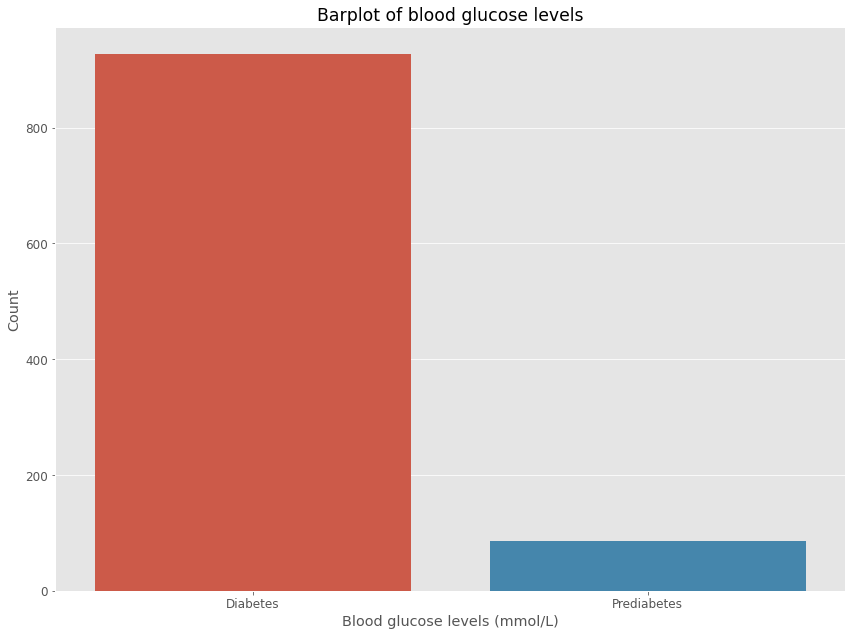

In [18]:
plot_bar(
    x=df['BSCat'].value_counts().keys(), y=df['BSCat'].value_counts().values, data=df,
    xlabel='Blood glucose levels (mmol/L)', ylabel='Count', title='Barplot of blood glucose levels', 
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

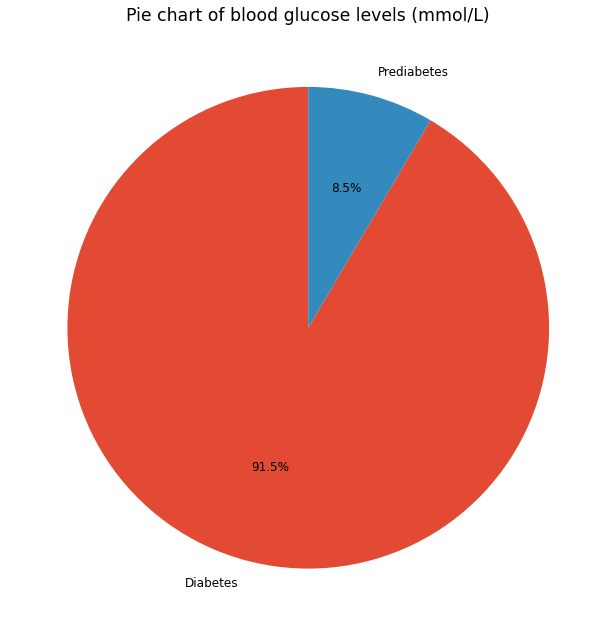

In [19]:
plot_pie(
    df=df, 
    x=df['BSCat'].value_counts().keys(), height=df['BSCat'].value_counts(normalize=True).values, startangle=90,
    title='Pie chart of blood glucose levels (mmol/L)'
)

BodyTemp Categories ==> 
Hypothermia: < 35.0 °C (95.0 °F),
Normal: 36.5–37.5 °C (97.7–99.5 °F),
Hyperthermia: > 37.5 or 38.3 °C (99.5 or 100.9 °F),
Hyperpyrexia: > 40.0 or 41.0 °C (104.0 or 105.8 °F)

In [20]:
def temp_cat(x):
    if x < 95:
        return 'Hypothermia'
    elif (x >= 97.7) & (x < 99.5):
        return 'Normal'
    elif (x >= 99.5) & (x < 100.9):
        return 'Hyperthermia'
    else:
        return 'Hyperpyrexia'
        
        
df['BodyTempCat'] = df['BodyTemp'].apply(temp_cat)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat,SystolicBPCat,DiastolicBPCat,BSCat,BodyTempCat
0,25,130,80,15.0,98.0,86,high risk,Youth,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal
1,35,140,90,13.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal
2,29,90,70,8.0,100.0,80,high risk,Adults,less than 120 mm Hg,less than 80 mm Hg,Diabetes,Hyperthermia
3,30,140,85,7.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal
4,35,120,60,6.1,98.0,76,low risk,Adults,120–129 mm Hg,less than 80 mm Hg,Prediabetes,Normal


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

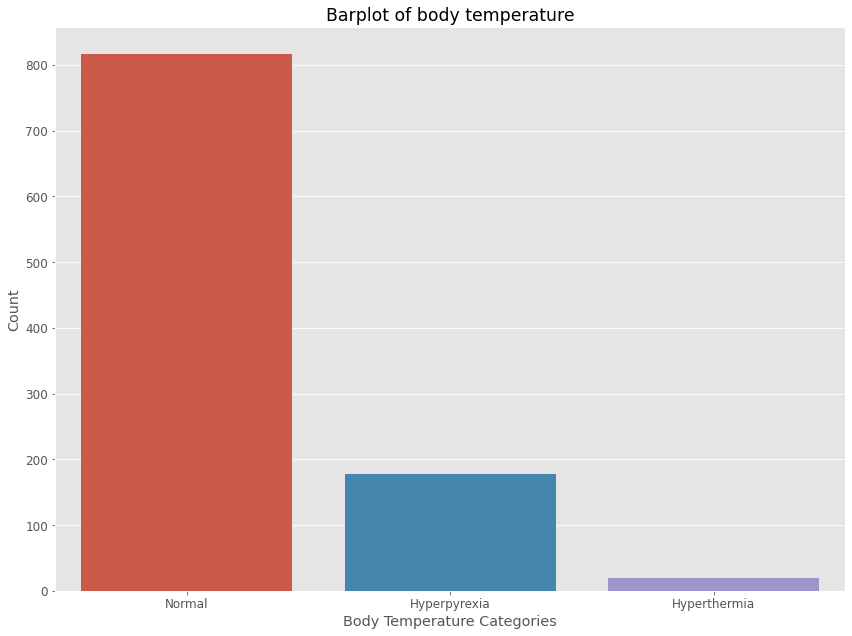

In [21]:
plot_bar(
    x=df['BodyTempCat'].value_counts().keys(), y=df['BodyTempCat'].value_counts().values, data=df,
    xlabel='Body Temperature Categories', ylabel='Count', title='Barplot of body temperature', 
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

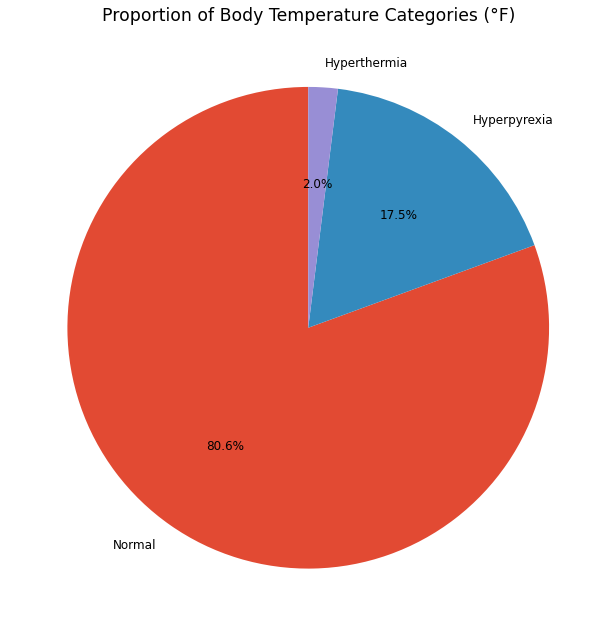

In [22]:
plot_pie(
    df=df, 
    x=df['BodyTempCat'].value_counts().keys(), height=df['BodyTempCat'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of Body Temperature Categories (°F)'
)

HeartRate Categories ==> 
Slow: less than 60 beats per minute,
Normal: between 60-100 beats per minute,
Fast: greater than 100 beats per minute

In [23]:
def hrt_rate_cat(x):
    if x < 60:
        return 'Slow'
    elif (x > 60) & (x < 100):
        return 'Normal'
    else:
        return 'Fast'

df['HeartRateCat'] = df['HeartRate'].apply(hrt_rate_cat)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat,SystolicBPCat,DiastolicBPCat,BSCat,BodyTempCat,HeartRateCat
0,25,130,80,15.0,98.0,86,high risk,Youth,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal,Normal
1,35,140,90,13.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal,Normal
2,29,90,70,8.0,100.0,80,high risk,Adults,less than 120 mm Hg,less than 80 mm Hg,Diabetes,Hyperthermia,Normal
3,30,140,85,7.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal,Normal
4,35,120,60,6.1,98.0,76,low risk,Adults,120–129 mm Hg,less than 80 mm Hg,Prediabetes,Normal,Normal


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

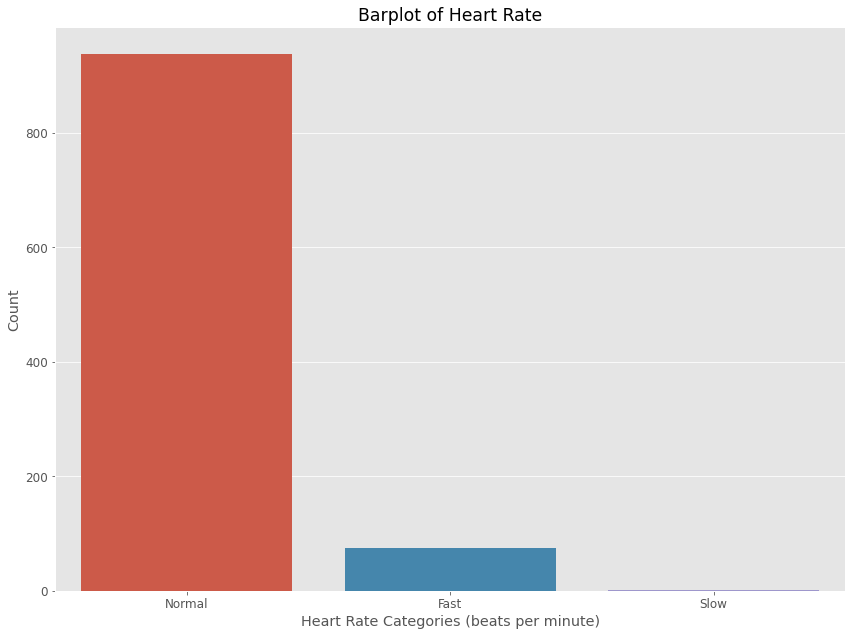

In [24]:
plot_bar(
    x=df['HeartRateCat'].value_counts().keys(), y=df['HeartRateCat'].value_counts().values, data=df,
    xlabel='Heart Rate Categories (beats per minute)', ylabel='Count', title='Barplot of Heart Rate', 
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

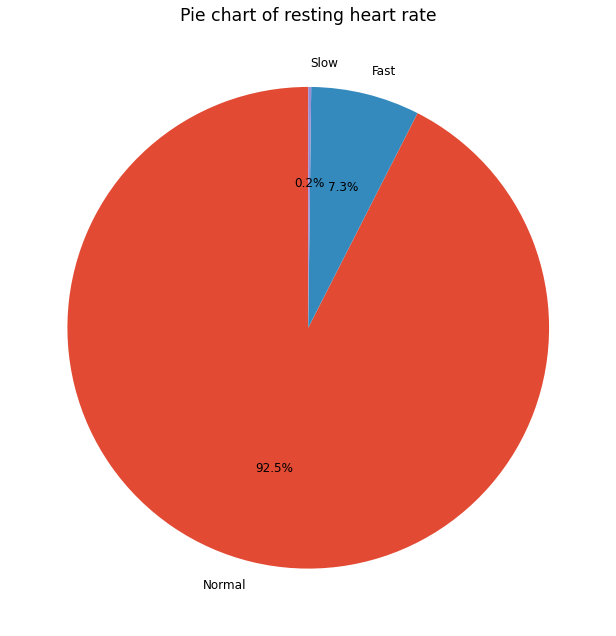

In [25]:
plot_pie(
    df=df, 
    x=df['HeartRateCat'].value_counts().keys(), height=df['HeartRateCat'].value_counts(normalize=True).values, startangle=90,
    title='Pie chart of resting heart rate'
)

# Correlation Coefficient

In [26]:
corr_matrix = df.corr()
corr_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


In [27]:
corr_matrix.shape

(6, 6)

plot heatmap - absolute value(0-0.3; weak/no relationship, 0.3-0.7; moderate, > 0.7 strong correlation)

<AxesSubplot:>

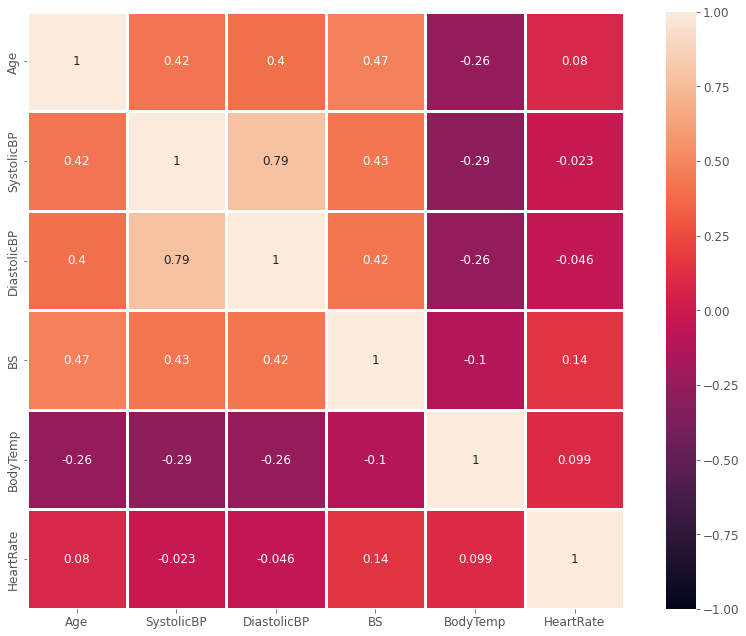

In [28]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, linewidths=3)

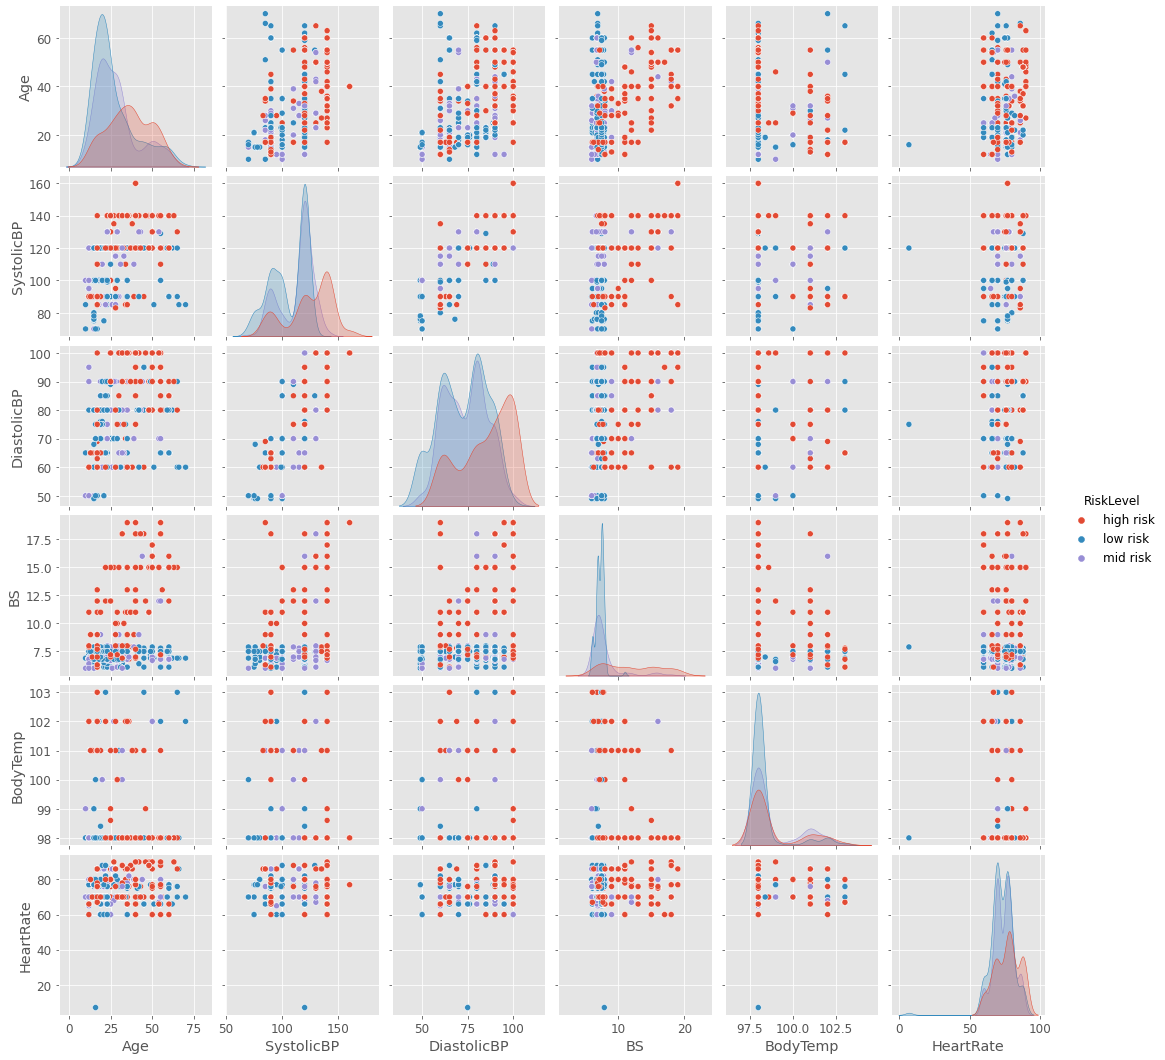

In [29]:
sns.pairplot(df, hue='RiskLevel')                            

# Missing Values Exploration

In [30]:
df.isna().sum()

Age               0
SystolicBP        0
DiastolicBP       0
BS                0
BodyTemp          0
HeartRate         0
RiskLevel         0
AgeCat            0
SystolicBPCat     0
DiastolicBPCat    0
BSCat             0
BodyTempCat       0
HeartRateCat      0
dtype: int64

# Data Splitting

In [31]:
from sklearn.model_selection import train_test_split

# select feature and target columns
feature_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat',
                   'BodyTempCat', 'HeartRateCat'] 

target_column = ['RiskLevel']

X, y = df[feature_columns], df[target_column]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Features dimension: {0} ==> Target dimensions: {1}'.format(X.shape, y.shape))
print('X train dimensions: {0} ==> y train dimensions: {1}'.format(X_train.shape, y_train.shape))
print('X test dimensions: {0} ==> y test dimensions: {1}'.format(X_test.shape, y_test.shape))

Features dimension: (1014, 12) ==> Target dimensions: (1014, 1)
X train dimensions: (811, 12) ==> y train dimensions: (811, 1)
X test dimensions: (203, 12) ==> y test dimensions: (203, 1)


# Pipeline

Linear Support Vector Classifier

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer, OrdinalEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV


# select numeric columns and create numeric transformer 
numeric_features = X.select_dtypes(include=np.number).columns
numeric_transformer = Pipeline(steps=[
    ('qt', QuantileTransformer())
])


# select non-numeric columns and create non-numeric transformer
non_numeric_features = X.select_dtypes(exclude=np.number).columns
non_numeric_transformer = Pipeline(steps=[
    ('ordenc', OrdinalEncoder())
])

# apply transformer to numeric and non-numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('non_numeric', non_numeric_transformer, non_numeric_features)
    ]
)

# Append classifier to preprocessing pipeline to have a full prediction pipeline.
lsv_clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('lsvc', LinearSVC(random_state=42))
    ]
)

lsv_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', 'BodyTempCat',
       'HeartRateCat'],
      dtype='object'))])),
                ('lsvc', LinearSVC(random_state=42))])

In [33]:
print(f"Coeffient: {lsv_clf.named_steps['lsvc'].coef_}")
print('\n')
print(f"Intercept: {lsv_clf.named_steps['lsvc'].intercept_}")

Coeffient: [[-0.03924934  1.18195211  1.07885828  1.58170664  0.42293605  0.39932386
  -0.0669449   0.36630468  0.08027534  0.56757218 -0.11479854 -0.15456042]
 [-0.28660792 -2.26878855  0.14705004 -0.38185986  0.16420357 -0.48474308
   0.02830664 -0.29135934 -0.08699623  0.07126299  0.51547626  0.34293323]
 [ 0.32686506  0.70224212 -0.79010305 -0.99246905 -0.53458253  0.0585733
   0.0364385  -0.11956081  0.07902985 -0.54065197 -0.42429182 -0.18682277]]


Intercept: [-2.72554784  0.47718398  1.02758874]


In [34]:
# helper fucntion to display model test score
def display_test_score(classifier):
    print('model test score: %.2f' % classifier.score(X_test, y_test))

Linear SVC Test Score

In [35]:
display_test_score(lsv_clf)

model test score: 0.61


KNeighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Append classifier to preprocessing pipeline to have a full prediction pipeline.
knn_clf = Pipeline(steps=[
    ('preprocessor', preprocessor), ('KnnC', KNeighborsClassifier())
])

knn_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', 'BodyTempCat',
       'HeartRateCat'],
      dtype='object'))])),
                ('KnnC', KNeighborsClassifier())])

KNN Model Score

In [37]:
display_test_score(knn_clf)

model test score: 0.70


Support Vector Classifier

In [38]:
from sklearn.svm import SVC

# Append classifier to preprocessing pipeline to have a full prediction pipeline.
svc = Pipeline(steps=[
    ('preprocessor', preprocessor), ('svc', SVC(random_state=0))
])

svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', 'BodyTempCat',
       'HeartRateCat'],
      dtype='object'))])),
                ('svc', SVC(random_state=0))])

SVC Test Score 

In [39]:
display_test_score(svc)

model test score: 0.64


Ensemble Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Append classifier to preprocessing pipeline to have a full prediction pipeline.
rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor), ('rfc', RandomForestClassifier(random_state=0))
])

rf_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', 'BodyTempCat',
       'HeartRateCat'],
      dtype='object'))])),
                ('rfc', RandomForestClassifier(random_state=0))])

Random Forest Classifier Test Score

In [41]:
display_test_score(rf_clf)

model test score: 0.84


# Hyper-parameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV

estimator = rf_clf
param_grid = {
    'rfc__n_estimators': np.arange(1, 101),
    'rfc__criterion' : ['gini', 'entropy'],
    'rfc__max_features' : ['auto', 'sqrt', 'log2']
}

scoring = 'accuracy'

rfc_gscv = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring, n_jobs=-1,
                        refit=True, return_train_score=True)

In [43]:
rfc_gscv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('qt',
                                                                                          QuantileTransformer())]),
                                                                         Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                                        ('non_numeric',
                                                                         Pipeline(steps=[('ordenc',
                                                                                          OrdinalEncoder())]),
                                                                         Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', '...
                         'rfc__n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             return_train_score=True, scoring='accuracy')

In [44]:
print('Best parameter: {0}'.format(rfc_gscv.best_params_))
print('Best score: %.2f' % rfc_gscv.best_score_)

Best parameter: {'rfc__criterion': 'entropy', 'rfc__max_features': 'auto', 'rfc__n_estimators': 20}
Best score: 0.83


In [45]:
sorted_keys = sorted(rfc_gscv.cv_results_.keys())
sorted_keys

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_rfc__criterion',
 'param_rfc__max_features',
 'param_rfc__n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [46]:
rfc_gscv_results = rfc_gscv.cv_results_
rfc_cvresults_df = pd.DataFrame(data=rfc_gscv_results)
rfc_cvresults_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__criterion,param_rfc__max_features,param_rfc__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048471,0.006482,0.012167,0.001163,gini,auto,1,"{'rfc__criterion': 'gini', 'rfc__max_features'...",0.680982,0.697531,...,0.741135,0.043797,598,0.878086,0.875193,0.882897,0.881356,0.876733,0.878853,0.002867
1,0.049668,0.002779,0.014761,0.003646,gini,auto,2,"{'rfc__criterion': 'gini', 'rfc__max_features'...",0.748466,0.685185,...,0.755866,0.042458,595,0.902778,0.884438,0.895223,0.893683,0.898305,0.894885,0.006078
2,0.057447,0.007291,0.014760,0.002475,gini,auto,3,"{'rfc__criterion': 'gini', 'rfc__max_features'...",0.748466,0.709877,...,0.774385,0.041961,586,0.924383,0.921418,0.913713,0.902928,0.910632,0.914615,0.007681
3,0.047672,0.009106,0.014162,0.001934,gini,auto,4,"{'rfc__criterion': 'gini', 'rfc__max_features'...",0.760736,0.728395,...,0.789184,0.040997,580,0.939815,0.921418,0.926040,0.913713,0.921418,0.924481,0.008629
4,0.050464,0.005557,0.028524,0.033112,gini,auto,5,"{'rfc__criterion': 'gini', 'rfc__max_features'...",0.760736,0.734568,...,0.794123,0.040058,571,0.939815,0.933744,0.924499,0.918336,0.929122,0.929103,0.007395


In [47]:
rfc_df = rfc_cvresults_df[['param_rfc__n_estimators', 'param_rfc__criterion', 'param_rfc__max_features', 'mean_train_score', 'mean_test_score']]

rfc_df.rename(columns={
    'param_rfc__n_estimators': 'n_estimators', 
    'param_rfc__criterion': 'criterion', 
    'param_rfc__max_features': 'max_features'
}, inplace=True)

rfc_df

,n_estimators,criterion,max_features,mean_train_score,mean_test_score
0,1,gini,auto,0.878853,0.741135
1,2,gini,auto,0.894885,0.755866
2,3,gini,auto,0.914615,0.774385
3,4,gini,auto,0.924481,0.789184
4,5,gini,auto,0.929103,0.794123
...,...,...,...,...,...
595,96,entropy,log2,0.940817,0.817557
596,97,entropy,log2,0.940817,0.817557
597,98,entropy,log2,0.940817,0.818791
598,99,entropy,log2,0.940817,0.822495


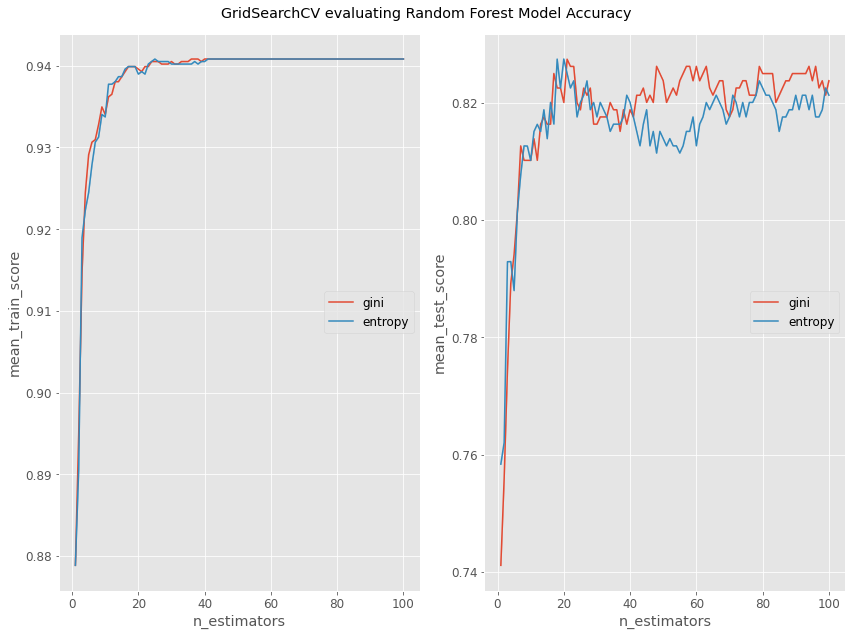

In [48]:
# initialte matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('GridSearchCV evaluating Random Forest Model Accuracy')

# plot line charts
sns.lineplot(
    x='n_estimators', y='mean_train_score', 
    hue='criterion',
    data=rfc_df, ax=ax1
)

# label axis 1 plot legend
ax1.legend(loc=5)

sns.lineplot(
    x='n_estimators', y='mean_test_score', 
    hue='criterion', 
    data=rfc_df, ax=ax2
)

# label axis 2 plot legend
ax2.legend(loc=5)

# Feature Importance

In [49]:
# select best features
feature_importance = rfc_gscv.best_estimator_.named_steps['rfc'].feature_importances_
feature_names = rfc_gscv.feature_names_in_

# create and sort feature importance based on feature importance
feat_imp = pd.DataFrame(data=feature_importance, index=feature_names)
feature_importance = feat_imp[0]

# print final output
final_output = feature_importance.sort_values(ascending=False)
final_output

BS                0.346562
SystolicBP        0.134321
Age               0.125963
DiastolicBP       0.119472
HeartRate         0.095102
BodyTemp          0.051013
SystolicBPCat     0.036527
AgeCat            0.027976
BodyTempCat       0.025668
DiastolicBPCat    0.018657
BSCat             0.010539
HeartRateCat      0.008200
Name: 0, dtype: float64

Plot Feature Importance Output

[Text(0.5, 0, 'Feature Importance (percent)'),
 Text(0, 0.5, 'Feature Names'),
 Text(0.5, 1.0, 'Bar plot of feature importance')]

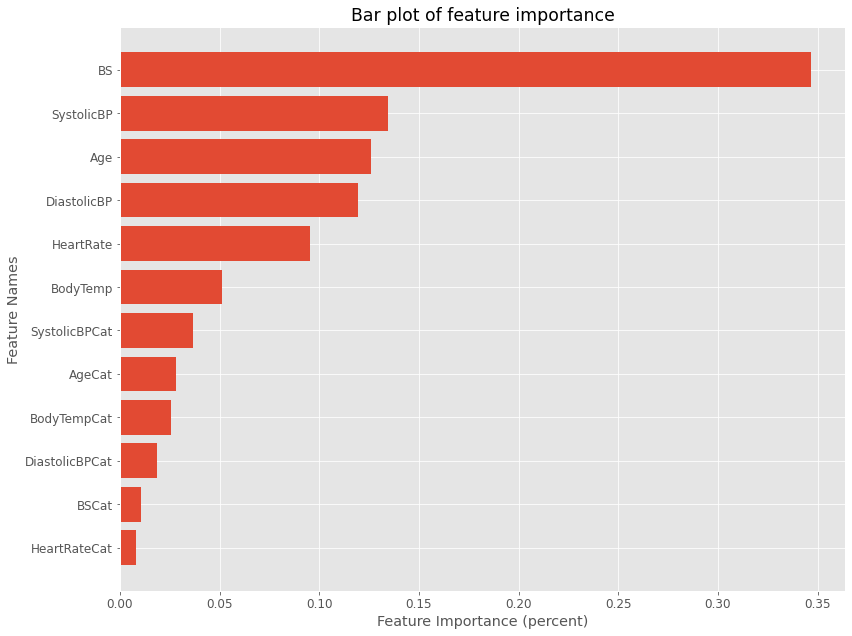

In [50]:
# create figure and axis
fig, ax = plt.subplots()

# plot horizontal bar graph
ax.barh(final_output.keys(), final_output.values, align='center')

# labels read top-to-bottom
ax.invert_yaxis()

# label bar plot
ax.set(xlabel='Feature Importance (percent)', ylabel='Feature Names', title='Bar plot of feature importance')

# Final Model Prediction

In [51]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor), ('rfc', RandomForestClassifier(n_estimators=20, criterion='gini', max_features='auto'))
])
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', 'BodyTempCat',
       'HeartRateCat'],
      dtype='object'))])),
                ('rfc', RandomForestClassifier(n_estimators=20))])

In [52]:
display_test_score(final_model)

model test score: 0.82


# Save Final Model

In [53]:
import joblib

# final model
model = final_model.fit(X_test, y_test)

joblib.dump(final_model, 'maternal_risk_prediction_model.pkl')

['maternal_risk_prediction_model.pkl']